In [7]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import requests 
import random
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations
import time

from sklearn import metrics
from sklearn import manifold, datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import SpectralClustering 
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import load_digits
from sklearn.datasets.samples_generator import make_blobs
from scipy import ndimage
from itertools import cycle

In [8]:
depWS20_1mW2s_path = 'Time.DepWS20.1mW2s.csv'
depWS20_2mW2S_path = 'Time.DepWS20.2mW2s.csv'
depWS250_uW2s_path = 'Time.DepWS250uW2s.csv'
dfDepWS20_1mW2s = pd.read_csv(depWS20_1mW2s_path)[1:].astype(float)
dfDepWS20_2mW2S = pd.read_csv(depWS20_2mW2S_path)[1:].astype(float)
dfDepWS250_uW2s = pd.read_csv(depWS250_uW2s_path)[1:].astype(float)

In [9]:
print(dfDepWS20_1mW2s.head())
print('-----------------------')
print(dfDepWS20_2mW2S.head())
print('-----------------------')
print(dfDepWS250_uW2s.head())
print('-----------------------')

       xv  T = 2  T = 4  T = 6  T = 8  T = 10  T = 12  T = 14  T = 16  T = 18  \
1  550.07  977.0  975.0  973.0  973.0   975.0   973.0   971.0   972.0   974.0   
2  550.34  975.0  970.0  974.0  973.0   973.0   971.0   973.0   971.0   975.0   
3  550.60  974.0  975.0  972.0  974.0   972.0   973.0   973.0   970.0   975.0   
4  550.86  972.0  972.0  973.0  973.0   973.0   971.0   972.0   970.0   973.0   
5  551.13  975.0  972.0  971.0  974.0   972.0   971.0   974.0   973.0   974.0   

    ...     T = 102  T = 104  T = 106  T = 108  T = 110  T = 112  T = 114  \
1   ...       973.0    971.0    972.0    972.0    972.0    970.0    970.0   
2   ...       973.0    970.0    973.0    971.0    971.0    972.0    972.0   
3   ...       976.0    972.0    972.0    972.0    971.0    974.0    971.0   
4   ...       972.0    972.0    974.0    975.0    972.0    972.0    972.0   
5   ...       974.0    973.0    972.0    970.0    972.0    973.0    972.0   

   T = 116  T = 118  T = 120  
1    974.0    969.0

In [10]:
listOfColumnLabelsForDepWS20_1mW2s = dfDepWS20_1mW2s.columns.tolist
listOfColumnLabelsForDepWS20_1mW2s

<bound method Index.tolist of Index(['xv', 'T = 2', 'T = 4', 'T = 6', 'T = 8', 'T = 10', 'T = 12', 'T = 14',
       'T = 16', 'T = 18', 'T = 20', 'T = 22', 'T = 24', 'T = 26', 'T = 28',
       'T = 30', 'T = 32', 'T = 34', 'T = 36', 'T = 38', 'T = 40', 'T = 42',
       'T = 44', 'T = 46', 'T = 48', 'T = 50', 'T = 52', 'T = 54', 'T = 56',
       'T = 58', 'T = 60', 'T = 62', 'T = 64', 'T = 66', 'T = 68', 'T = 70',
       'T = 72', 'T = 74', 'T = 76', 'T = 78', 'T = 80', 'T = 82', 'T = 84',
       'T = 86', 'T = 88', 'T = 90', 'T = 92', 'T = 94', 'T = 96', 'T = 98',
       'T = 100', 'T = 102', 'T = 104', 'T = 106', 'T = 108', 'T = 110',
       'T = 112', 'T = 114', 'T = 116', 'T = 118', 'T = 120'],
      dtype='object')>

In [11]:
def plotDataFrame(dataframe):
    fig, ax = plt.subplots(figsize=(8,4))
    for column in dataframe:
        if(column != 'xv'):
            color = "#%06x" % random.randint(0, 0xFFFFFF)
            columnLabel = column
            ax.scatter(dfDepWS20_1mW2s.xv.tolist(),
                       dataframe[column].tolist(),
                       c=color,
                       label=columnLabel
                      )
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [12]:
def plotLessDataFrame(dataframe, timeFactor):

    sum = 0
    for column in dataframe:
        if(column != 'xv' and sum%timeFactor == 0):
            plotDataFrameAtSpecificTime(dataframe,column)
        sum = sum + 1

In [13]:
def plotDataFrameAtSpecificTime(dataframe,column):
    fig, ax = plt.subplots(figsize=(8,4))
    color = "#%06x" % random.randint(0, 0xFFFFFF)
    columnLabel = column
    ax.scatter(dfDepWS20_1mW2s.xv.tolist(),
               dataframe[column].tolist(),
               c=color,
               label=columnLabel
               )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

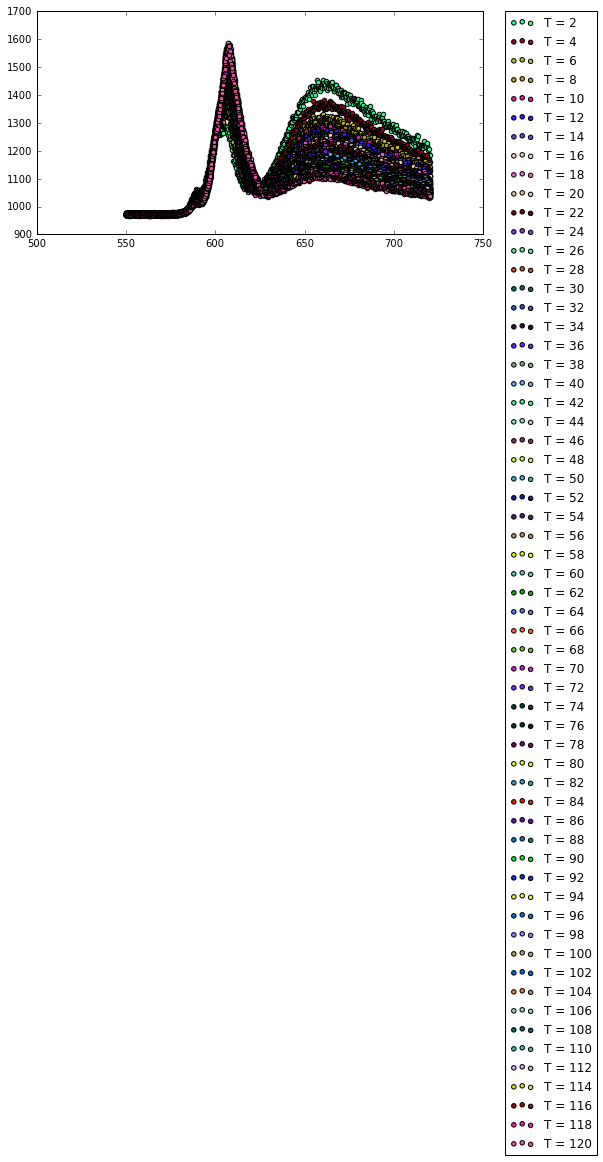

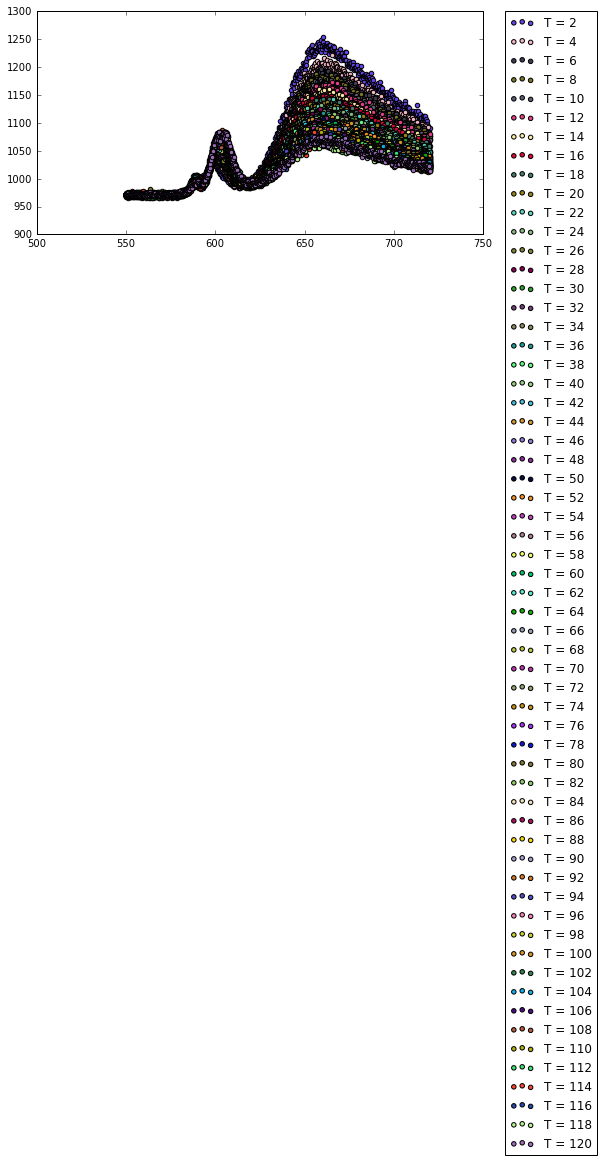

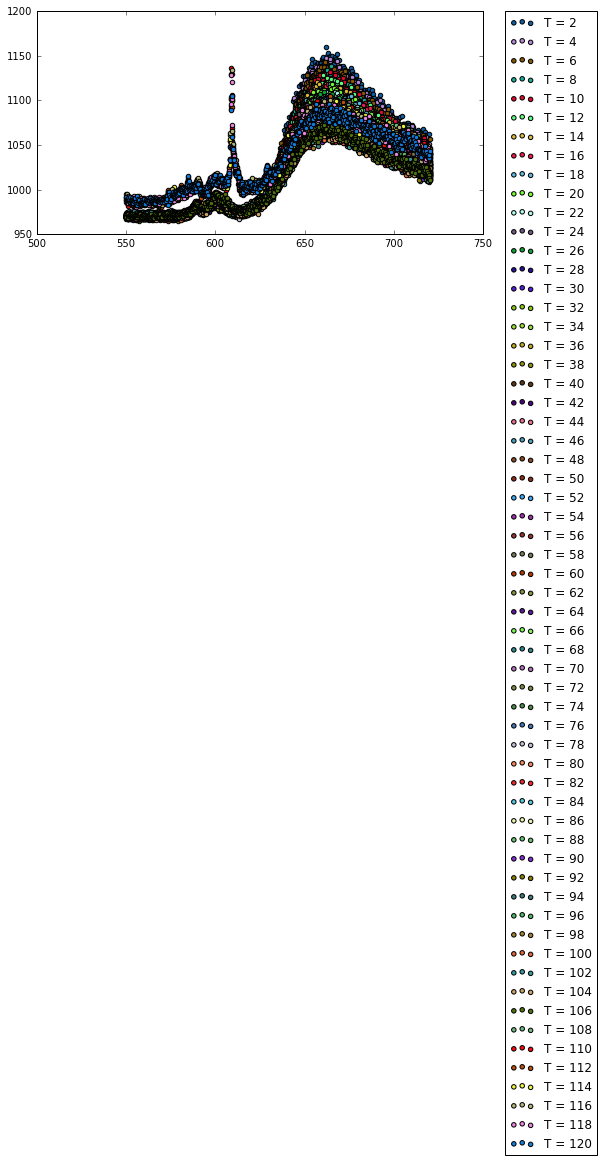

In [14]:
plotDataFrame(dfDepWS20_1mW2s)
plotDataFrame(dfDepWS20_2mW2S)
plotDataFrame(dfDepWS250_uW2s)

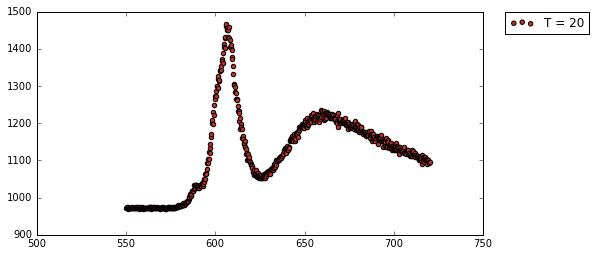

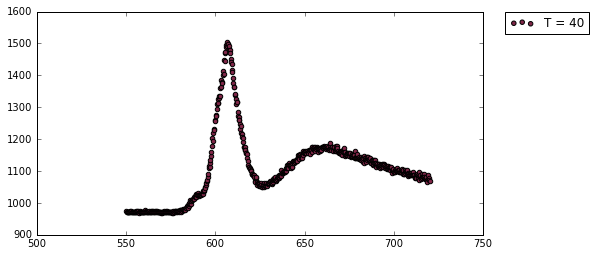

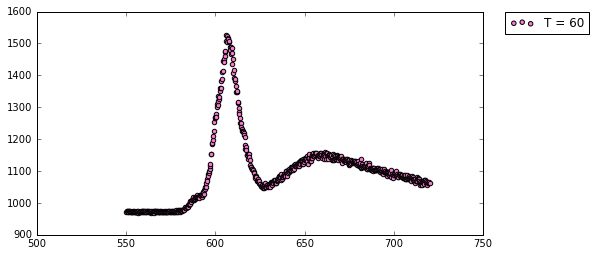

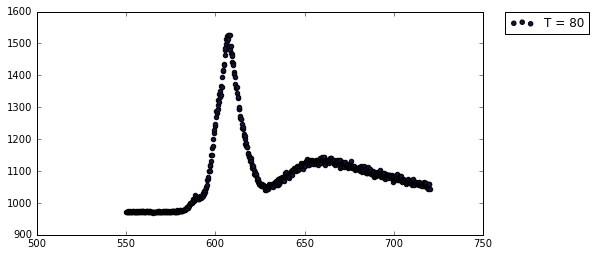

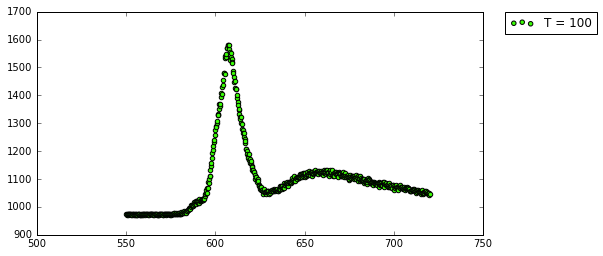

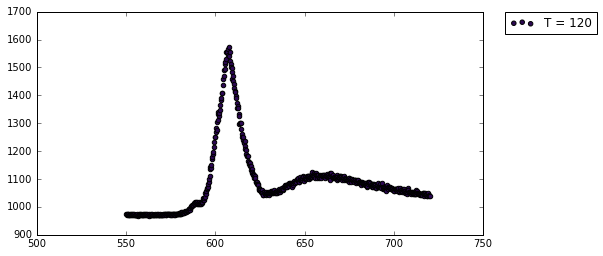

In [15]:
plotLessDataFrame(dfDepWS20_1mW2s,10)

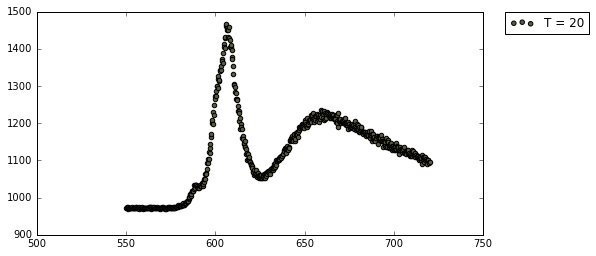

In [16]:
plotDataFrameAtSpecificTime(dfDepWS20_1mW2s,'T = 20')

In [17]:
dfDepWS20_1mW2s

,xv,T = 2,T = 4,T = 6,T = 8,T = 10,T = 12,T = 14,T = 16,T = 18,...,T = 102,T = 104,T = 106,T = 108,T = 110,T = 112,T = 114,T = 116,T = 118,T = 120
1,550.07,977.0,975.0,973.0,973.0,975.0,973.0,971.0,972.0,974.0,...,973.0,971.0,972.0,972.0,972.0,970.0,970.0,974.0,969.0,974.0
2,550.34,975.0,970.0,974.0,973.0,973.0,971.0,973.0,971.0,975.0,...,973.0,970.0,973.0,971.0,971.0,972.0,972.0,977.0,969.0,971.0
3,550.60,974.0,975.0,972.0,974.0,972.0,973.0,973.0,970.0,975.0,...,976.0,972.0,972.0,972.0,971.0,974.0,971.0,972.0,971.0,973.0
4,550.86,972.0,972.0,973.0,973.0,973.0,971.0,972.0,970.0,973.0,...,972.0,972.0,974.0,975.0,972.0,972.0,972.0,973.0,970.0,973.0
5,551.13,975.0,972.0,971.0,974.0,972.0,971.0,974.0,973.0,974.0,...,974.0,973.0,972.0,970.0,972.0,973.0,972.0,974.0,973.0,971.0
6,551.39,974.0,973.0,973.0,973.0,975.0,971.0,969.0,969.0,972.0,...,973.0,973.0,973.0,969.0,974.0,972.0,974.0,973.0,970.0,974.0
7,551.65,976.0,972.0,974.0,973.0,970.0,974.0,973.0,970.0,975.0,...,974.0,973.0,975.0,973.0,970.0,973.0,972.0,975.0,970.0,971.0
8,551.92,974.0,971.0,972.0,974.0,973.0,972.0,970.0,971.0,974.0,...,971.0,974.0,971.0,974.0,974.0,972.0,973.0,972.0,972.0,970.0
9,552.18,975.0,972.0,974.0,974.0,974.0,976.0,973.0,972.0,973.0,...,972.0,974.0,973.0,972.0,971.0,971.0,973.0,975.0,973.0,973.0
10,552.44,975.0,972.0,973.0,974.0,975.0,973.0,972.0,971.0,970.0,...,974.0,973.0,971.0,973.0,970.0,973.0,971.0,974.0,971.0,971.0


In [18]:
def plotRows(dataframe):
    listOfColumns = [2] * 60
    for x in range(1,len(listOfColumns)):
        listOfColumns[x] = listOfColumns[x - 1] + listOfColumns[x]
    fig, ax = plt.subplots(figsize=(8,4))
    for index,row in dataframe.iterrows():
        color = "#%06x" % random.randint(0, 0xFFFFFF)
        columnLabel = dataframe.iloc[index][0]
        ax.scatter(listOfColumns,
                   dataframe.iloc[index][1:].tolist(),
                   c=color,
                   label=columnLabel
                    )
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [19]:
def plotRowsOnSeperateGraphs(dataframe):
    listOfColumns = [1] * 60
    for x in range(1,len(listOfColumns)):
        listOfColumns[x] = listOfColumns[x - 1] + listOfColumns[x]
    for index,row in dataframe.iterrows():
        fig, ax = plt.subplots(figsize=(8,4))
        color = "#%06x" % random.randint(0, 0xFFFFFF)
        columnLabel = dataframe.iloc[index][0]
        ax.scatter(listOfColumns,
                   dataframe.iloc[index][1:].tolist(),
                   c=color,
                    label=columnLabel
                   )
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [20]:
# plotRows(dfDepWS20_1mW2s)

In [21]:
# plotRowsOnSeperateGraphs(dfDepWS20_1mW2s)

In [25]:
def reduceDataFrame(dataframe):
    return PCA(n_components=2).fit_transform(dfDepWS20_1mW2s[1:].astype(float))

In [22]:
reduced_data = PCA(n_components=2).fit_transform(dfDepWS20_1mW2s[1:].astype(float))

In [23]:
data = scale(dfDepWS20_1mW2s)
n_samples, n_features = data.shape
print("n_samples %d, \t n_features %d"
      % (n_samples, n_features))


n_samples 654, 	 n_features 61


In [24]:
print(reduced_data)

[[-1043.74876891  -223.38466002]
 [-1044.04452134  -223.49795305]
 [-1044.83761318  -225.81066017]
 ..., 
 [ -295.79445654    82.33071541]
 [ -304.18832164    86.79010473]
 [ -312.99086886    71.47837688]]


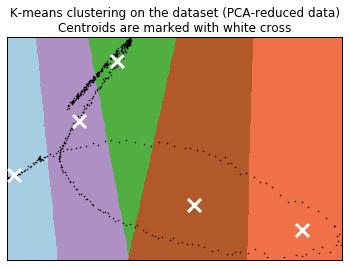

In [28]:
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=1)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 10     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

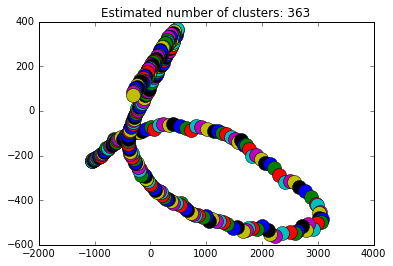

In [22]:

af = AffinityPropagation(preference=-50).fit(reduced_data)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)


plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = reduced_data[cluster_centers_indices[k]]
    plt.plot(reduced_data[class_members, 0], reduced_data[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in reduced_data[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

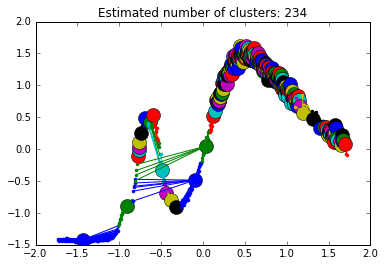

In [23]:
af = AffinityPropagation(preference=-50).fit(data)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)


plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = data[cluster_centers_indices[k]]
    plt.plot(data[class_members, 0], data[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in data[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [24]:
bandwidth = estimate_bandwidth(reduced_data, quantile=0.2, n_samples=654)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(reduced_data)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 7


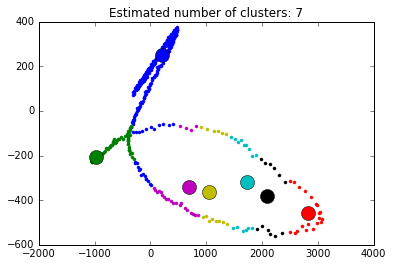

In [25]:
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(reduced_data[my_members, 0], reduced_data[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [26]:
bandwidth = estimate_bandwidth(data, quantile=.3, n_samples=654)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(data)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 1


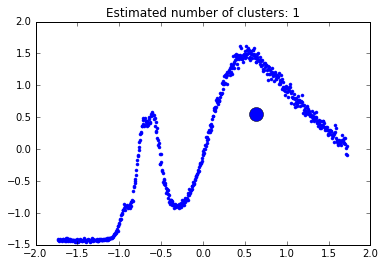

In [27]:
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(data[my_members, 0], data[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [29]:

def plot_clustering(reduced_data_red, reduced_data, labels, title=None):
    x_min, x_max = np.min(reduced_data_red, axis=0), np.max(reduced_data_red, axis=0)
    data_red = (reduced_data_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(reduced_data_red.shape[0]):
        plt.text(reduced_data_red[i, 0], reduced_data_red[i, 1], str(reduced_data[i]),
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

Computing embedding
Done.
ward
average
complete


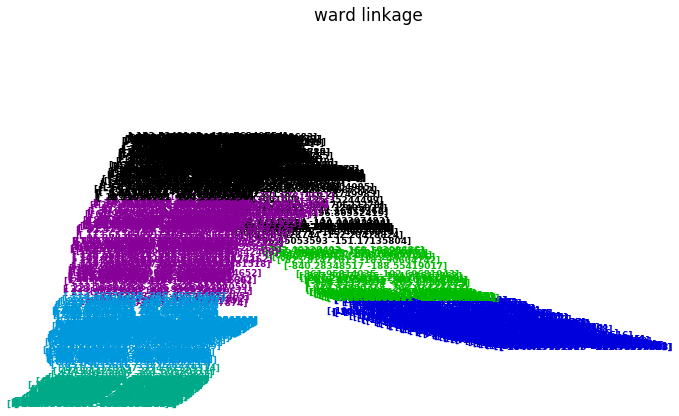

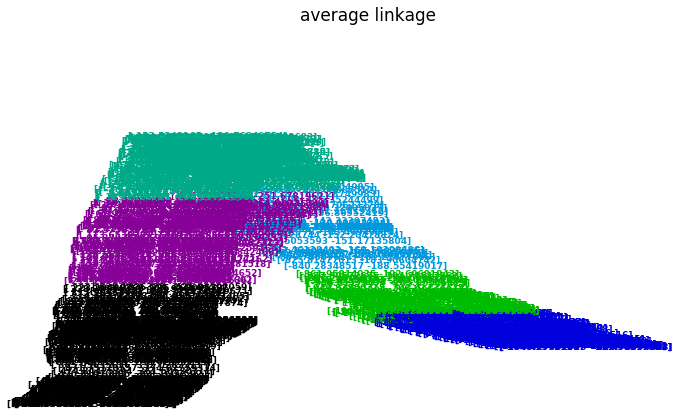

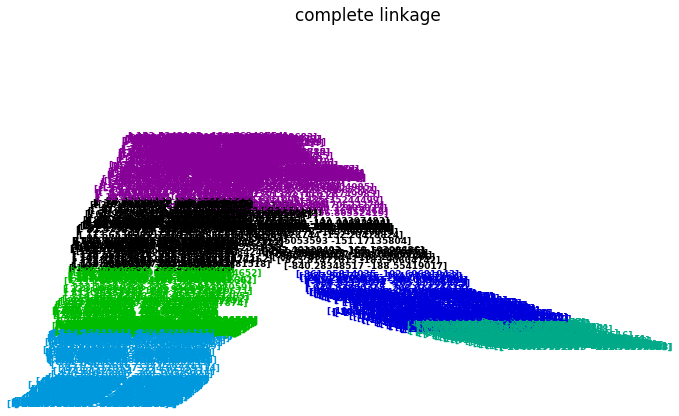

In [30]:

print("Computing embedding")
reduced_data_red = manifold.SpectralEmbedding(n_components=2).fit_transform(reduced_data)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=6)
    clustering.fit(reduced_data_red)
    print(linkage)

    plot_clustering(reduced_data_red, reduced_data, clustering.labels_, "%s linkage" % linkage)


plt.show()

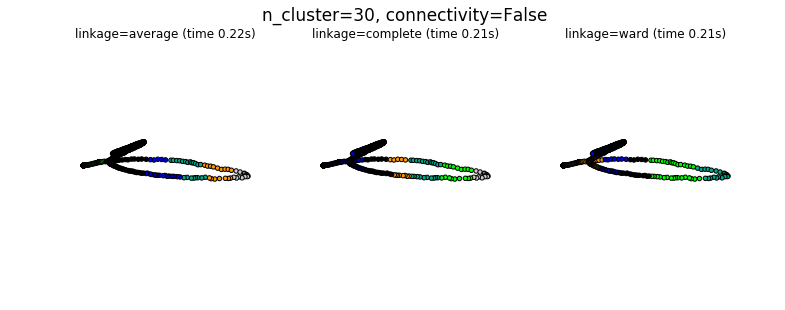

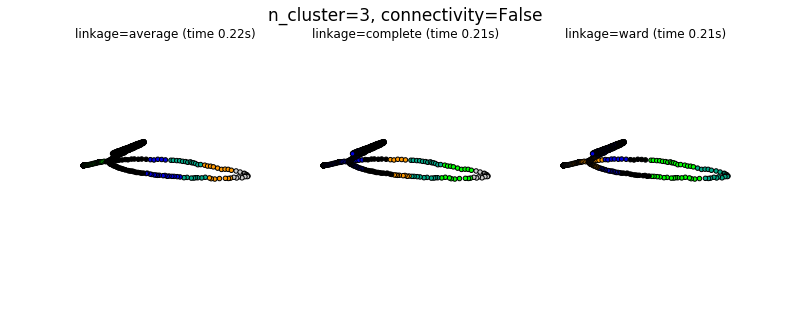

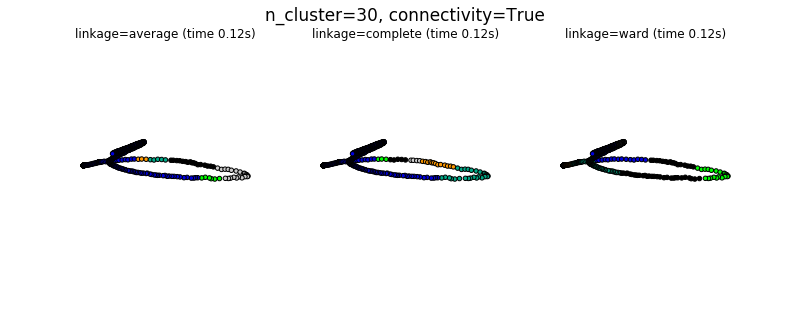

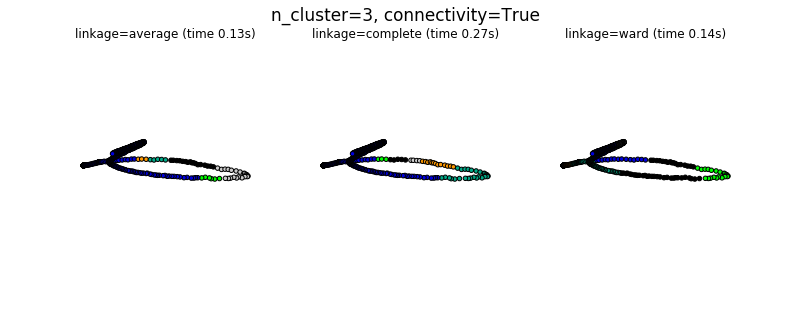

In [32]:

knn_graph = kneighbors_graph(reduced_data, 6, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (30, 3):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average', 'complete', 'ward')):
            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=6)
            t0 = time.time()
            model.fit(reduced_data)
            elapsed_time = time.time() - t0
            plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=model.labels_,
                        cmap=plt.cm.spectral)
            plt.title('linkage=%s (time %.2fs)' % (linkage, elapsed_time),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)


plt.show()

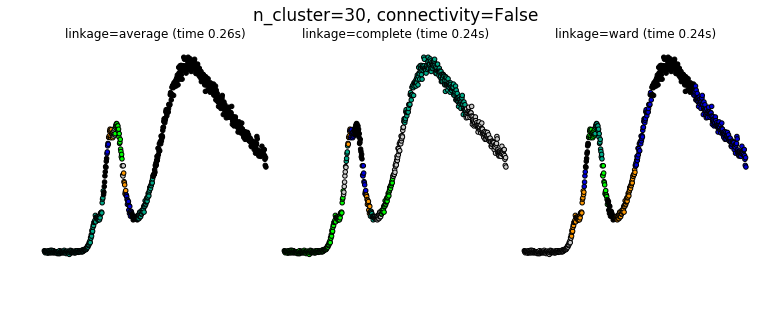

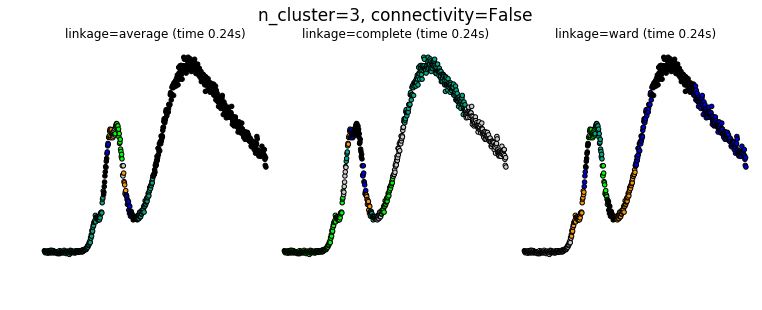

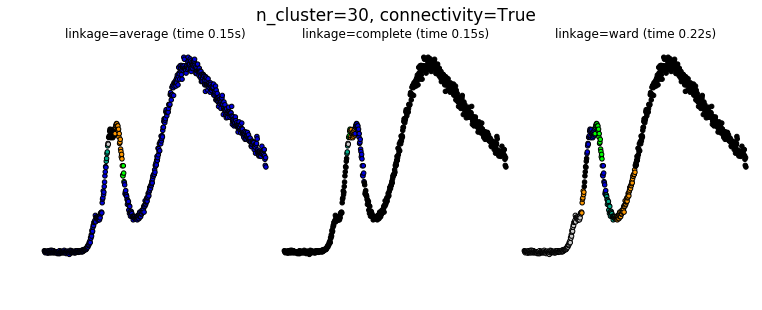

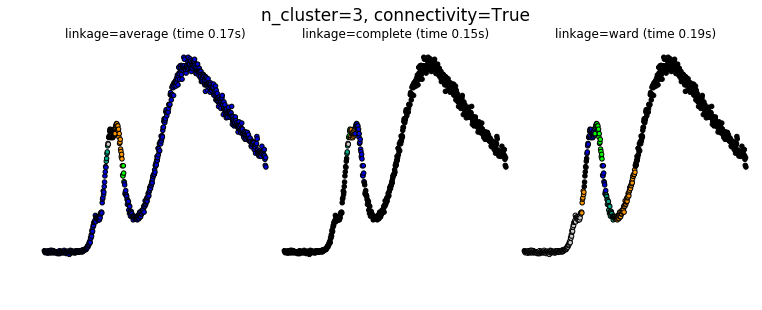

In [33]:

knn_graph = kneighbors_graph(data, 6, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (30, 3):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average', 'complete', 'ward')):
            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=6)
            t0 = time.time()
            model.fit(data)
            elapsed_time = time.time() - t0
            plt.scatter(data[:, 0], data[:, 1], c=model.labels_,
                        cmap=plt.cm.spectral)
            plt.title('linkage=%s (time %.2fs)' % (linkage, elapsed_time),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)


plt.show()


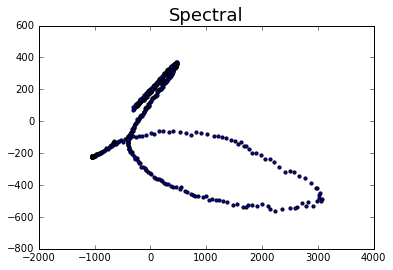

In [34]:

spectral = SpectralClustering(n_clusters=5,
                                          eigen_solver='arpack',
                                          affinity="nearest_neighbors")
   
   
t0 = time.time()
spectral.fit(reduced_data)
t1 = time.time()



plt.title('Spectral', size=18)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=10)

if hasattr(spectral, 'cluster_centers_'):
    centers = spectral.cluster_centers_
    center_colors = colors[:len(centers)]
    plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.xticks(())
    plt.yticks(())
    plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
    transform=plt.gca().transAxes, size=15,
    horizontalalignment='right')
    plot_num += 1

plt.show()